# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [2]:
df = pd.read_csv(r"C:\Users\jovei\OneDrive\Área de Trabalho\git\EBAC\Atividades\Estatística Básica\MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv", delimiter=';')
#df.head(10)

Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [3]:
#Seu código aqui para a média
df[['Preco_Normal']].mean()
# a média é 2070.99729


media_preco = df.groupby('Categoria')['Preco_Normal'].mean().reset_index()
media_preco

# as categorias de lactose, congelados e belleza-y-cuidado-personal são as variaveis acima da média 
# as outras variaveis estão abaixo da média 

,Categoria,Preco_Normal
0,belleza-y-cuidado-personal,1783.556485
1,comidas-preparadas,3095.043478
2,congelados,2108.042553
3,frutas,1724.473684
4,instantaneos-y-sopas,765.491228
5,lacteos,2385.219239
6,verduras,1343.296875


In [4]:
#Seu código aqui para a mediana
df[['Preco_Normal']].median()
# a mediana é 1269.0

mediana_preco = df.groupby('Categoria')['Preco_Normal'].median().reset_index()
mediana_preco

# as categorias de instantaneos-y-sopas, frutas  e lacteos são unica abaixo da mediana o resto das amostras estão acima da mediana 

,Categoria,Preco_Normal
0,belleza-y-cuidado-personal,1569.0
1,comidas-preparadas,3290.0
2,congelados,1519.0
3,frutas,1195.0
4,instantaneos-y-sopas,439.0
5,lacteos,989.0
6,verduras,1180.0


# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [5]:
#Seu código aqui
desvio_padrao = df.groupby('Categoria')['Preco_Normal'].std().reset_index()
desvio_padrao

# O produto lactose e que possui o maior desvio, avaliando a média ele ficou acima dela já avaliando a mediana ele ficou bem abaixo

,Categoria,Preco_Normal
0,belleza-y-cuidado-personal,2210.041719
1,comidas-preparadas,2019.911428
2,congelados,2111.539896
3,frutas,1639.151114
4,instantaneos-y-sopas,1170.232869
5,lacteos,3925.816164
6,verduras,1012.699625


# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

{'whiskers': [<matplotlib.lines.Line2D at 0x26b0d72bbf0>,
 'caps': [<matplotlib.lines.Line2D at 0x26b0d768230>,
 'boxes': [<matplotlib.lines.Line2D at 0x26b0d6eb980>],
 'medians': [<matplotlib.lines.Line2D at 0x26b0d768800>],
 'fliers': [<matplotlib.lines.Line2D at 0x26b0d768ad0>],
 'means': []}

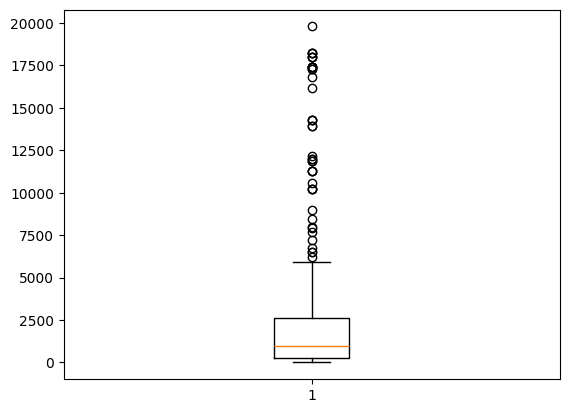

In [6]:
#Seu código aqui
media_preco_lacteos = df[df['Categoria'] == 'lacteos']

plt.boxplot(media_preco_lacteos['Preco_Normal'])

# depois de plotado o grafico de boxplot e possivel observar varios outliers

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

<function matplotlib.pyplot.show(close=None, block=None)>

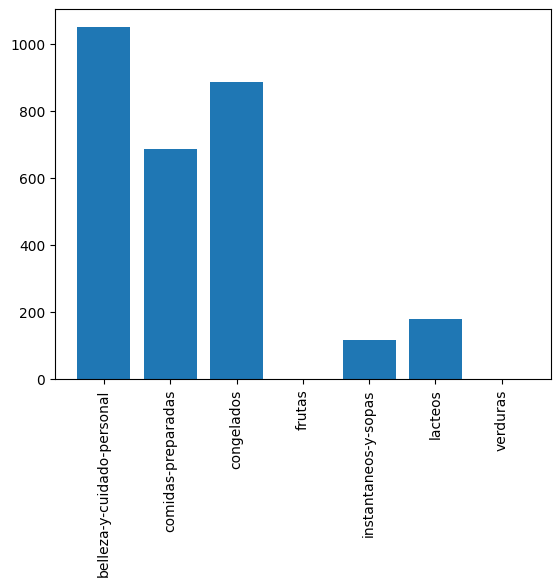

In [7]:
# Seu código aqui
media_preco_desconto = df.groupby('Categoria')['Preco_Desconto'].mean().reset_index()
media_preco_desconto

plt.bar(media_preco_desconto['Categoria'], media_preco_desconto['Preco_Desconto'])
plt.xticks(rotation=90)
plt.show

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [8]:
# Seu código aqui

media_desconto = df.groupby(['Categoria', 'Marca'])['Preco_Desconto'].mean().reset_index()

fig = px.bar(
    media_desconto,
    x='Marca',
    y='Preco_Desconto',
    color='Categoria',
    barmode='group',  # Agrupar as barras por categoria
    title='Média de Desconto por Categoria e Marca',
    labels={'Preco_Desconto': 'Média de Desconto', 'Marca': 'Marca'},
)

# Exibir o gráfico
fig.show()